# Пространство имён

Ранее мы могли задать функцию определив в ней переменную и для этой переменной **было принято правило** о том что она существует только внутри функции и только в ней.

In [1]:
def func():
    s = 20
    return s

print(s)

NameError: name 's' is not defined

На самом деле область которая используется внутри функции называется **"локальной"**. Потому что она существует только в КОНТЕКСТЕ исполнения функции.

In [2]:
# Глобальная область
s = 10
def func():
    # Локальная область
    s = 20
    return s

print(s)
print(func())
print(s)

10
20
10


**Глобальная** область видимости -- это такая область которая задается с самого начала запуска нашей программы, и находится на 0 позиции относительно строки выполнения кода.

**Встроенное** пространство(объемлящая область видимости) -- область которая пораждается ОТНОСИТЕЛЬНО ЛОКАЛЬНОЙ ОБЛАСТИ. т.е. внутри локальной пораждается ещё одна локальная.


**Встроенное** пространство имен включает в себя имена каких-либо встроенных функций. **Локальное** представляет собой имена, которые мы используем внутри каких-либо функций, которые мы используем и создаем самостоятельно. **Глобальное** пространство имен включает в себя все, что есть в нашей программе, исключая лишь локальное пространство.

In [3]:
# Глобальная область
s = 10
def func():
    # Локальная область
    def func2():
        s = 30
    func2() # * т.е. только вот тут может быть вызвана объемлящая функция
    s = 20

print(s)
func()
# func2()# Ошибка, т.к. данная функция находится внутри локальной области и может существовать только в связке с func() *
print(s)

10
10


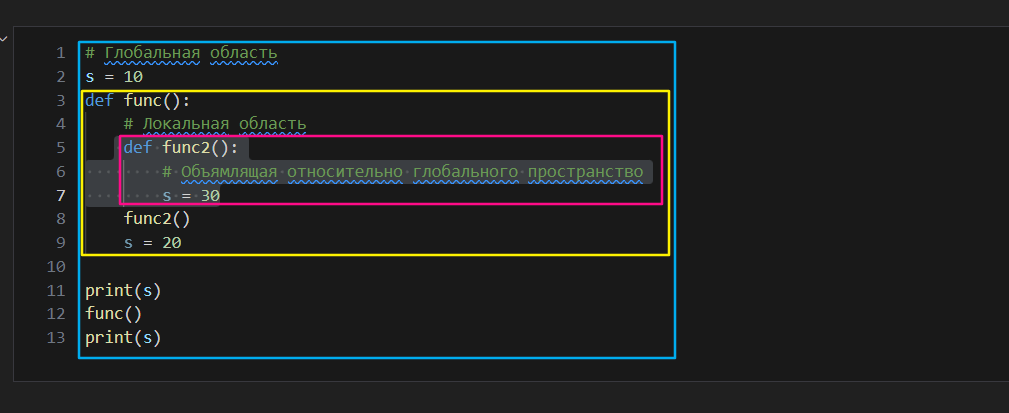

Но данную "историю" мы можем использовать по другом **простроя связь** между данными функциями и областями 

# **Работает не корректно в ipynb смотреть в .py файле**

In [3]:
globals()

{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  '# Глобальная область\ns = 10\ndef func():\n    # Локальная область\n    s = 20\n    return s\n\nprint(s)\nfunc()\nprint(s)',
  '# Глобальная область\ns = 10\ndef func():\n    # Локальная область\n    s = 20\n    return s\n\nprint(s)\nprint(func())\nprint(s)',
  'globals()'],
 '_oh': {2: 'ok', 3: 'ok'},
 '_dh': [WindowsPath('c:/Projects/Lessons/ValeriaML_learn_02_06/python/lesson3')],
 'In': ['',
  '# Глобальная область\ns = 10\ndef func():\n    # Локальная область\n    s = 20\n    return s\n\nprint(s)\nfunc()\nprint(s)',
  '# Глобальная область\ns = 10\ndef func():\n    # Локальная область\n    s = 20\n    return s\n\nprint(s)\nprint(func())\nprint(s)',
  'globals()'],
 'Out': {2: 'ok', 3: 'ok'},
 'get_ipython'

globals - позволяет просматривать значения и данные находящие на ГЛОБАЛЬНОМ УРОВНЕ

locals - позволяет просматривать данные и значения ОТНОСИТЕЛЬНО ТОЙ ОБЛАСТИ в которой находится на данный момент

In [5]:
# Глобальная область
s = 10
d = 29
def func():
    # Локальная область
    global s, d
    s = 20
    def func2():
        global s
        s = 30
        print("Локальное пространство для функции func2() :", locals())
    print("Локальное пространство для функции func() :", locals())
    func2()


print(f'Глобальная область {s=}',)
func()
print(f'Глобальная область {s=}')


# print(globals())

10
10


{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  'def func():\n    s = 20\n    return s\n\nprint(s)',
  '# Глобальная область\ns = 10\ndef func():\n    # Локальная область\n    s = 20\n    return s\nprint(s)\nfunc()\nprint(s)',
  '# Глобальная область\ns = 10\ndef func():\n    # Локальная область\n    def func2():\n        s = 30\n    s = 20\n\nprint(s)\nfunc()\nprint(s)',
  '# Глобальная область\ns = 10\ndef func():\n    # Локальная область\n    def func2():\n        s = 30\n    func2()\n    s = 20\n\n\nprint(s)\nfunc()\nprint(s)\n\nglobals()\n# locals()',
  '# Глобальная область\ns = 10\ndef func():\n    # Локальная область\n    def func2():\n        s = 30\n    func2()\n    s = 20\n\n\nprint(s)\nfunc()\nprint(s)\n\n# globals()\nlocals()'],
 '_oh': {4: {...}

# Немного примеров. **Лучше запускать в .py файле**

Задача со складом. У нас есть общее хранилище с продуктами. Описывается 3 функции для взаимодействия со складом.

add_item - добавляет предмет на склад
remove_item - удаляет предмет на склад
display_inventory - отображает текущее состояние склада склад

In [4]:
inv = {}

def add_item(item: str, quantity: int):
    if item in inv:
        inv[item] += quantity
    else:
        inv[item] = quantity

def remove_item(item: str, quantity: int):
    if item in inv:
        if inv[item] >= quantity:
            inv[item] -= quantity
        else:
            print(f'Ошибка: недостаточно {item} на складе')
    else:
        print(f"Ошибка: {item} отсутствует на складе")

def display_inventory():
    print('Склад', end='\n\n')
    for item, quantity in inv.items():
        print(f"{item}: {quantity}")
    print()

if __name__ == "__main__": # Если файл который мы запускаем, является ГЛАВНЫМ или ОСНОВНЫМ ЗАПУСКАЕМЫМ то выполняем код под условием
    print(f'{inv=}')
    add_item("Яблоки",50)
    add_item("Бананы",30)
    display_inventory()
    remove_item("Яблоки",30)
    display_inventory()
    remove_item("Груши",10)
    print(f'{inv=}')


inv={}
Склад

Яблоки: 50
Бананы: 30

Склад

Яблоки: 20
Бананы: 30

Ошибка: Груши отсутствует на складе
inv={'Яблоки': 20, 'Бананы': 30}
